<a href="https://colab.research.google.com/github/FulISun/Computer_Vision/blob/main/04_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [1] 데이터 로드 및 기본 정보 확인

In [ ]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./kaggle_diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


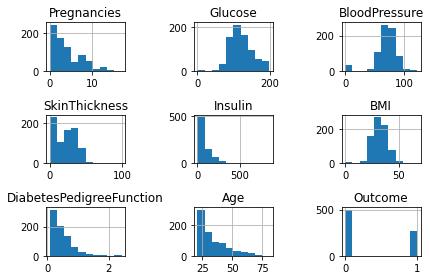

In [ ]:
# 전체 Histogram

df.hist()

plt.tight_layout()
plt.show()

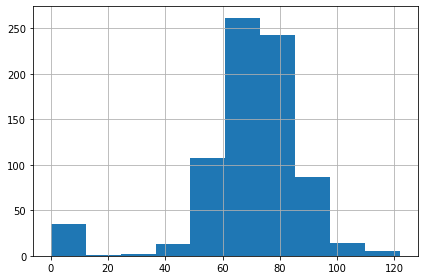

In [ ]:
# 개별 histogram
df['BloodPressure'].hist()

plt.tight_layout()
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## [2] 데이터 전처리

In [ ]:
# missing value 확인

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# 데이터 0인 값 개수 확인

for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col + ": " + str(missing_rows))

Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [ ]:
import numpy as np

# outlier 처리

df['Glucose'] = df['Glucose'].replace(0, np.nan)
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan)
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan)
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

# missing value 처리

df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean())
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean())
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean())
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [ ]:
for col in df.columns:
    
    missing_rows = df.loc[df[col] == 0].shape[0]
    print(col + ": " + str(missing_rows))

Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df_scaled = df.copy() # 원본 DataFrame 보존

In [ ]:
## feature column, label column 추출 후 DF 생성

feature_df = df_scaled[df_scaled.columns.difference(['Outcome'])] # outcome 제외한 df

label_df = df_scaled['Outcome']

print(feature_df.shape, label_df.shape)

(768, 8) (768,)


In [ ]:
# 스케일링

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_std = scaler.fit_transform(feature_df)
print(type(df_std))

df_std = pd.DataFrame(df_std, columns = feature_df.columns)

<class 'numpy.ndarray'>


In [ ]:
# pandas <=> numpy

feature_np = df_std.to_numpy().astype('float32')
label_np = label_df.to_numpy().astype('float32')

print(feature_np.shape, label_np.shape)

(768, 8) (768,)


## [3] 머신러닝/딥러닝

In [ ]:
s = np.arange(len(feature_np))

np.random.shuffle(s)

feature_np = feature_np[s]
label_np = label_np[s]

In [ ]:
split = 0.15

test_num = int(split*len(label_np))

x_test = feature_np[0:test_num]
y_test = label_np[0:test_num]

x_train = feature_np[test_num:]
y_train = label_np[test_num:]

print(x_test.shape, y_test.shape, x_train.shape, y_train.shape)

(115, 8) (115,) (653, 8) (653,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam

model = Sequential()

model.add(Dense(4, activation = 'relu', input_shape = (8,) ))
model.add(Dense(1, activation = 'sigmoid', input_shape = (32,) ))

In [ ]:
model.compile(optimizer= SGD(learning_rate=1e-3), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_train, y_train, epochs=400, validation_data=(x_test, y_test))

end_time = datetime.now()

print('\nElapsed time => ', end_time - start_time)

Epoch 1/400
21/21 [==============================] - 1s 10ms/step - loss: 0.6938 - accuracy: 0.5513 - val_loss: 0.7018 - val_accuracy: 0.5652
Epoch 2/400
21/21 [==============================] - 0s 3ms/step - loss: 0.6906 - accuracy: 0.5528 - val_loss: 0.6991 - val_accuracy: 0.5652
Epoch 3/400
21/21 [==============================] - 0s 3ms/step - loss: 0.6875 - accuracy: 0.5528 - val_loss: 0.6965 - val_accuracy: 0.5652
Epoch 4/400
21/21 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5559 - val_loss: 0.6941 - val_accuracy: 0.5739
Epoch 5/400
21/21 [==============================] - 0s 4ms/step - loss: 0.6818 - accuracy: 0.5559 - val_loss: 0.6917 - val_accuracy: 0.5652
Epoch 6/400
21/21 [==============================] - 0s 4ms/step - loss: 0.6791 - accuracy: 0.5605 - val_loss: 0.6893 - val_accuracy: 0.5652
Epoch 7/400
21/21 [==============================] - 0s 3ms/step - loss: 0.6763 - accuracy: 0.5651 - val_loss: 0.6870 - val_accuracy: 0.5652
Epoch 8/400


In [ ]:
model.evaluate(x_test, y_test)  # 또는 pred = model.predict()

4/4 [==============================] - 0s 3ms/step - loss: 0.5190 - accuracy: 0.6870


[0.5190069675445557, 0.686956524848938]

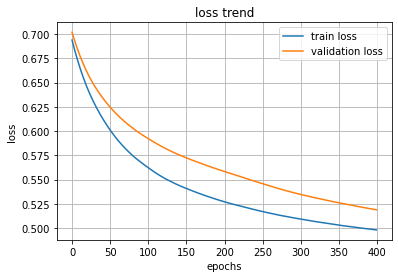

In [ ]:
plt.title('loss trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label = 'train loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')
plt.legend(loc = 'best')

plt.show()

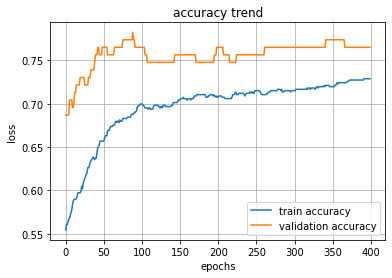

In [ ]:
plt.title('accuracy trend')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')
plt.legend(loc = 'best')

plt.show()